## Mengimport dan menelaah data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank_transactions.csv')
df = df.sample(n=100000,random_state = 42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 892845 to 804143
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            100000 non-null  object 
 1   CustomerID               100000 non-null  object 
 2   CustomerDOB              99671 non-null   object 
 3   CustGender               99899 non-null   object 
 4   CustLocation             99992 non-null   object 
 5   CustAccountBalance       99783 non-null   float64
 6   TransactionDate          100000 non-null  object 
 7   TransactionTime          100000 non-null  int64  
 8   TransactionAmount (INR)  100000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
892845,T892846,C5725279,8/9/84,M,JASPUR,84447.82,7/9/16,183210,11858.0
444994,T444995,C4588538,2/1/94,M,GURGAON,12549.49,16/8/16,161300,250.0
614896,T614897,C2416476,14/11/90,M,NEW DELHI,33607.65,26/8/16,102007,3360.0
457036,T457037,C5940151,15/9/90,M,HYDERABAD,38238.86,21/8/16,110438,250.0
997441,T997442,C5922989,27/11/88,M,PURBO MEDINIPUR,9506.85,14/9/16,90810,33.0


In [4]:
df.isnull().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                329
CustGender                 101
CustLocation                 8
CustAccountBalance         217
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,99350,99350.00,99350,99350.00,99350.00
mean,1984-07-21 20:11:36.012078528,114448.56,2016-07-25 21:10:33.759436288,157151.06,1595.75
min,1800-01-01 00:00:00,0.00,2016-01-08 00:00:00,1.00,0.00
25%,1983-08-11 00:00:00,4740.49,2016-06-09 00:00:00,124105.25,165.00
50%,1988-10-06 00:00:00,16795.22,2016-08-20 00:00:00,164348.50,460.00
75%,1992-07-03 00:00:00,57144.82,2016-09-09 00:00:00,200104.75,1198.00
max,2073-12-31 00:00:00,115035495.10,2016-12-09 00:00:00,235958.00,600008.32
std,NaN,878115.09,NaN,51358.37,6302.30


In [9]:
cat_columns = ['CustGender', 'CustLocation']
for col in cat_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: CustGender
CustGender
M    72679
F    26671
Name: count, dtype: int64


Column: CustLocation
CustLocation
MUMBAI                         9746
NEW DELHI                      8028
BANGALORE                      7686
GURGAON                        7057
DELHI                          6661
                               ... 
LOTUS BUS STOP WORLI MUMBAI       1
JEEDI METLA  HYDERABAD            1
AIT                               1
AMBEDKAR STATUE HYDERABAD         1
EAST SINGBHUM                     1
Name: count, Length: 4327, dtype: int64




In [10]:
df['CustomerDOB'].value_counts()

CustomerDOB
1800-01-01    5385
1989-01-01      81
1991-01-01      72
1987-01-01      68
1991-06-08      62
              ... 
2052-12-14       1
1977-12-22       1
2040-10-02       1
2071-02-08       1
2066-11-24       1
Name: count, Length: 12511, dtype: int64

In [11]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index,axis = 0)
df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] - pd.DateOffset(years = 100)
df['CustomerAge'] = ((pd.to_datetime('today') - df['CustomerDOB'])/np.timedelta64(1, 'D')/365.25).round(0)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,M,JASPUR,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,M,GURGAON,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,M,NEW DELHI,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,M,HYDERABAD,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,M,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.00,35.00


In [12]:
df['CustomerAge'].describe()

count   93965.00
mean       38.66
std         8.83
min         3.00
25%        33.00
50%        36.00
75%        42.00
max       100.00
Name: CustomerAge, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93965 entries, 892845 to 804143
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            93965 non-null  object        
 1   CustomerID               93965 non-null  object        
 2   CustomerDOB              93965 non-null  datetime64[ns]
 3   CustGender               93965 non-null  object        
 4   CustLocation             93965 non-null  object        
 5   CustAccountBalance       93965 non-null  float64       
 6   TransactionDate          93965 non-null  datetime64[ns]
 7   TransactionTime          93965 non-null  int64         
 8   TransactionAmount (INR)  93965 non-null  float64       
 9   CustomerAge              93965 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 7.9+ MB


## Analisis Data menggunakan EDA

In [14]:
df1 = df.copy()

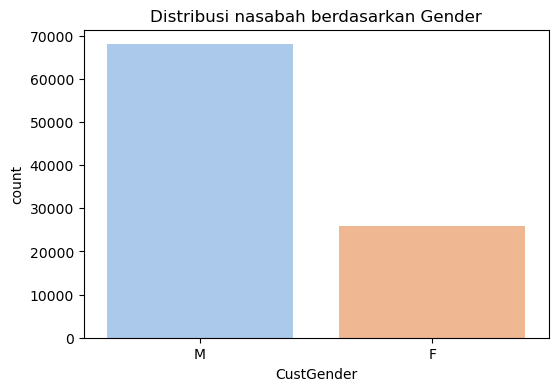

In [15]:
# Visualisasi Distribusi nasabah berdasarkan gender ('CustGender')
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df1, palette='pastel')
plt.title('Distribusi nasabah berdasarkan Gender')
plt.show()

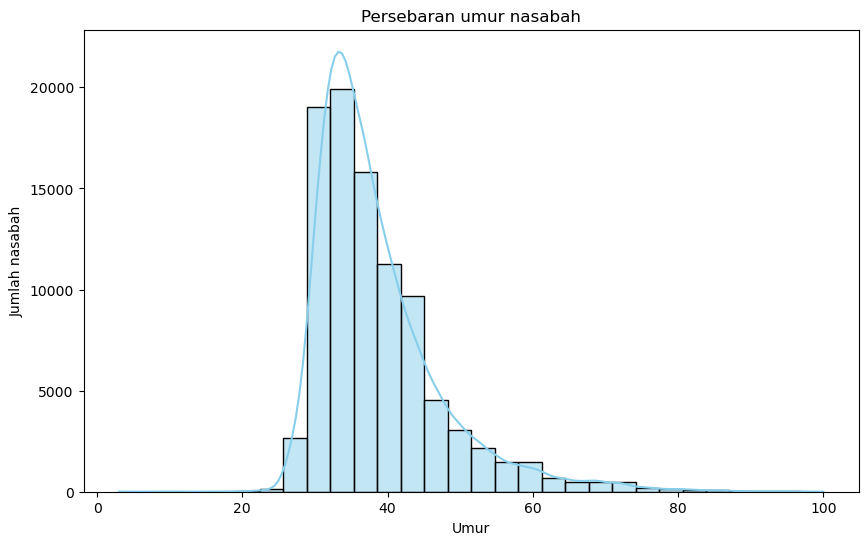

In [16]:
# Visualisasi Distribusi umur nasabah berdasarkan DOB ('CustomerDOB') 
plt.figure(figsize=(10, 6))
sns.histplot(df1['CustomerAge'], bins=30, kde=True, color='skyblue')
plt.title('Persebaran umur nasabah')
plt.xlabel('Umur')
plt.ylabel('Jumlah nasabah')
plt.show()

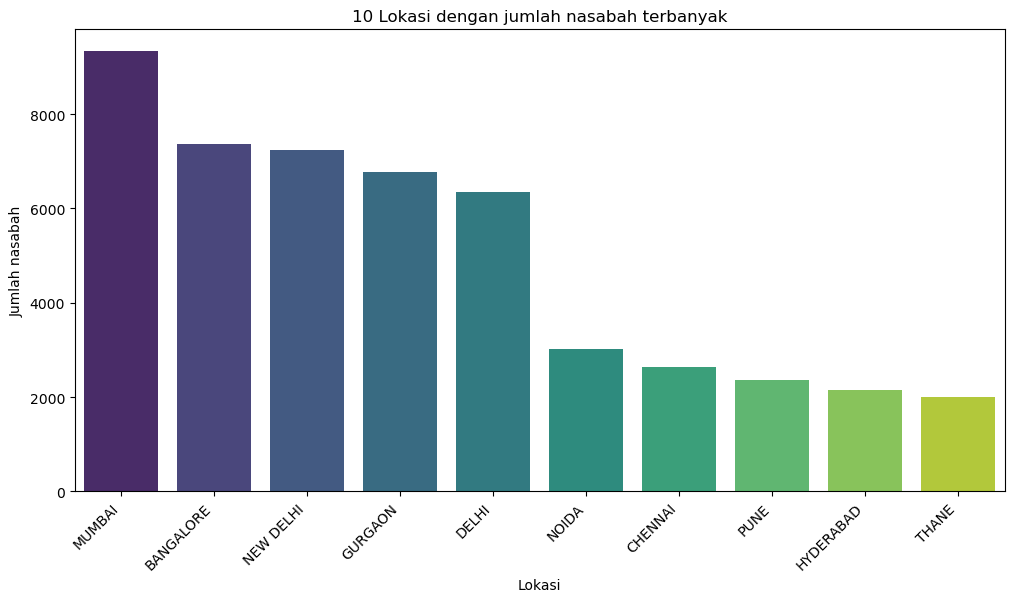

In [17]:
# Visualisasi Lokasi dengan jumlah nasabah terbanyak ('CustLocation')
location_counts = df1['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('10 Lokasi dengan jumlah nasabah terbanyak')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah nasabah')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
# 2

In [19]:
df2 = df1.copy()

In [20]:
# Membuat metode IQR untuk mengatasi Outlier pada dataframe
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data

In [21]:
# Mengatasi outlier pada kolom CustAccountBalance dan TransactionAmount (INR)
df1 = handle_outliers_iqr(df1, 'CustAccountBalance')
df1 = handle_outliers_iqr(df1, 'TransactionAmount (INR)')

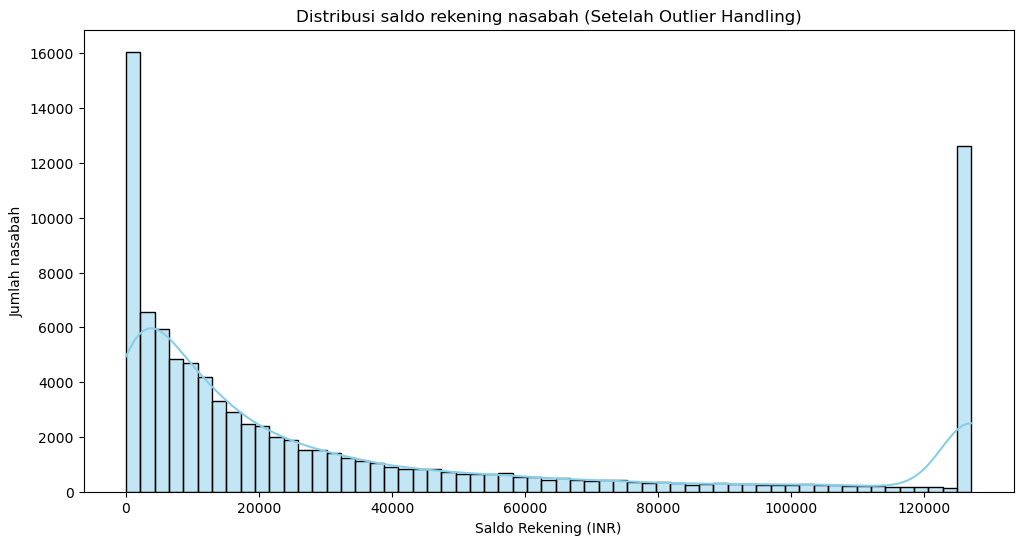

In [22]:
# Visualisasi Distribusi saldo rekening setiap nasabah ('CustAccountBalance')
plt.figure(figsize=(12, 6))
sns.histplot(df1['CustAccountBalance'], kde=True, color='skyblue')
plt.title('Distribusi saldo rekening nasabah (Setelah Outlier Handling)')
plt.xlabel('Saldo Rekening (INR)')
plt.ylabel('Jumlah nasabah')
plt.show()

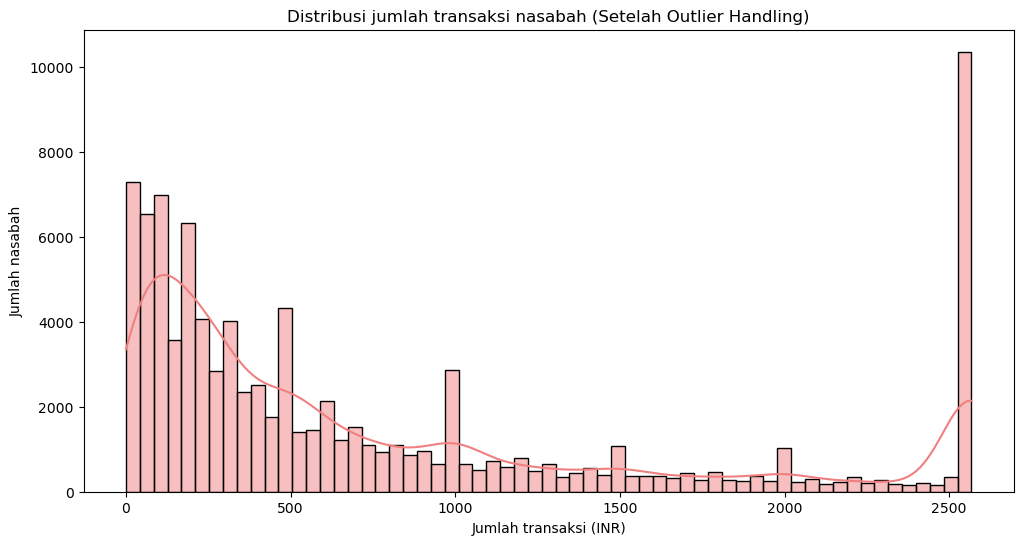

In [23]:
# Visualisasi Distribusi jumlah transaksi setiap nasabah ('TransactionAmount (INR)')
plt.figure(figsize=(12, 6))
sns.histplot(df1['TransactionAmount (INR)'], kde=True, color='lightcoral')
plt.title('Distribusi jumlah transaksi nasabah (Setelah Outlier Handling)')
plt.xlabel('Jumlah transaksi (INR)')
plt.ylabel('Jumlah nasabah')
plt.show()

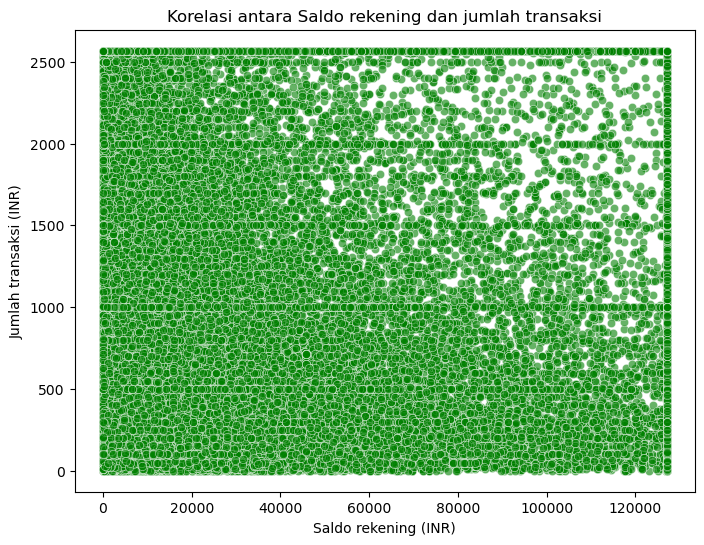

In [24]:
# Visualisasi Korelasi antara saldo rekening nasabah dengan jumlah transaksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df1, color='green', alpha=0.6)
plt.title('Korelasi antara Saldo rekening dan jumlah transaksi')
plt.xlabel('Saldo rekening (INR)')
plt.ylabel('Jumlah transaksi (INR)')
plt.show()

In [25]:
df1[["TransactionAmount (INR)", "CustAccountBalance"]].describe()

,TransactionAmount (INR),CustAccountBalance
count,93965.00,93965.00
mean,784.08,36766.43
std,833.39,43693.27
min,0.00,0.00
25%,155.00,4602.13
50%,436.05,16041.66
75%,1120.00,53580.00
max,2567.50,127046.81


In [26]:
# 3

In [27]:
top_10_locations = df1['CustLocation'].value_counts().nlargest(10)

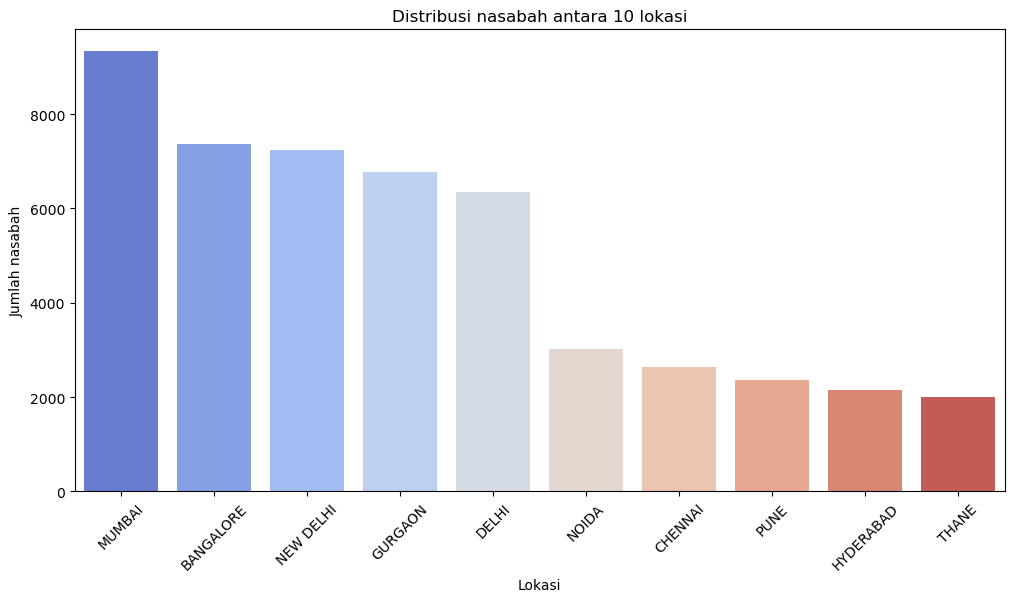

In [28]:
# Visualisasi Distribusi nasabah dari 10 lokasi dengan jumlah nasabah terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='coolwarm')
plt.title('Distribusi nasabah antara 10 lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah nasabah')
plt.xticks(rotation=45)
plt.show()

In [29]:
location_transaction_volumes = df1.groupby('CustLocation')['TransactionAmount (INR)'].sum().nlargest(10).sort_values(ascending = False)

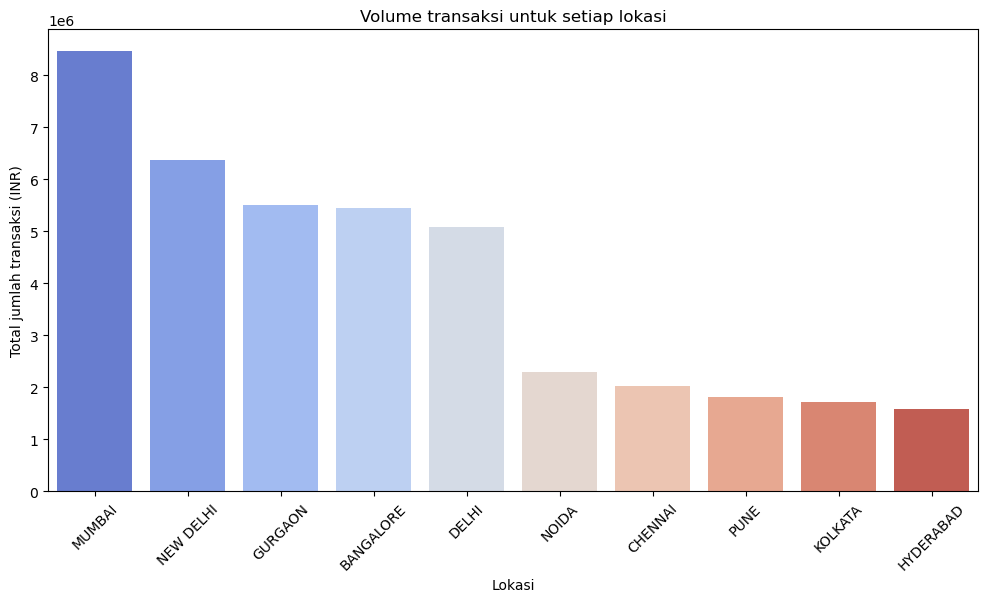

In [30]:
# Visualisasi jumlah transaksi di lokasi berbeda
plt.figure(figsize=(12, 6))
sns.barplot(x=location_transaction_volumes.index, y=location_transaction_volumes.values, palette='coolwarm')
plt.title('Volume transaksi untuk setiap lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Total jumlah transaksi (INR)')
plt.xticks(rotation=45)
plt.show()

In [31]:
# 4 

In [32]:
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])

current_date = df1['TransactionDate'].max()
rfm_data = df1.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,  # Perhitungan Kebaruan (Recency) 
    'TransactionID': 'count',  # Perhitungan Frekuensi (Frequency) 
    'TransactionAmount (INR)': 'sum'  # Perhitungan Moneter (Monetary)
})

rfm_data.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

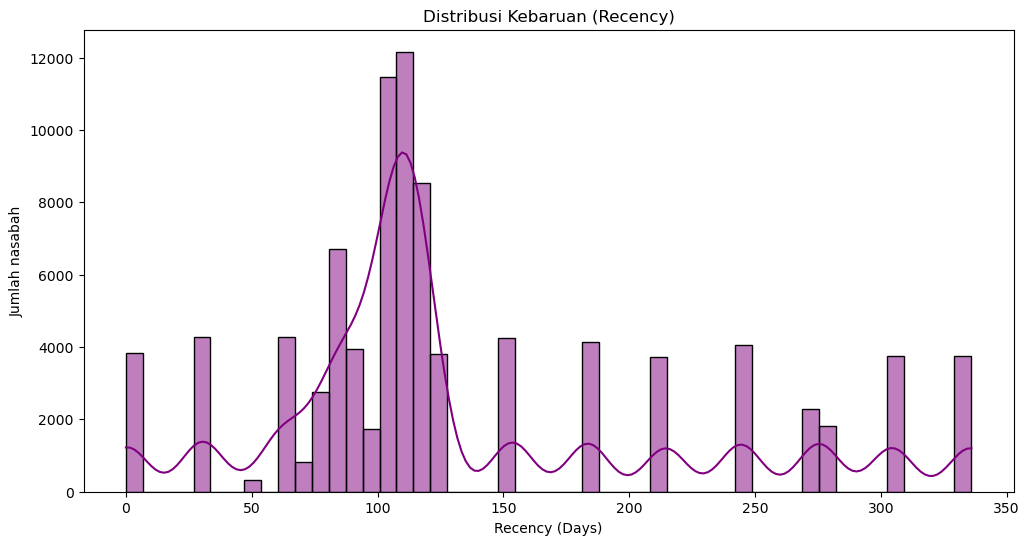

In [33]:
# Visualisasi Recency
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Recency'], bins=50, kde=True, color='purple')
plt.title('Distribusi Kebaruan (Recency)')
plt.xlabel('Recency (Days)')
plt.ylabel('Jumlah nasabah')
plt.show()

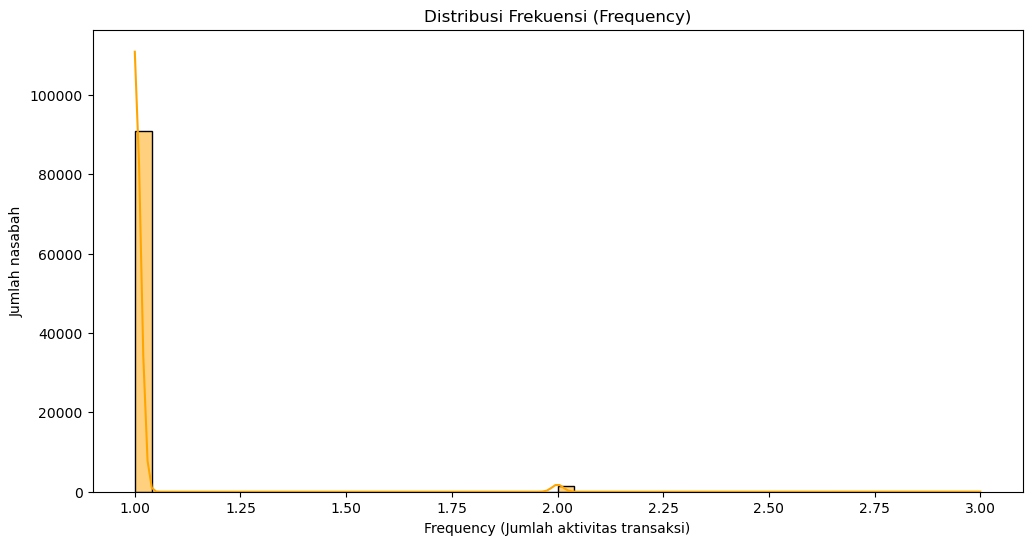

In [34]:
# Visualisasi Frequency
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Frequency'], bins=50, kde=True, color='orange')
plt.title('Distribusi Frekuensi (Frequency)')
plt.xlabel('Frequency (Jumlah aktivitas transaksi)')
plt.ylabel('Jumlah nasabah')
plt.show()

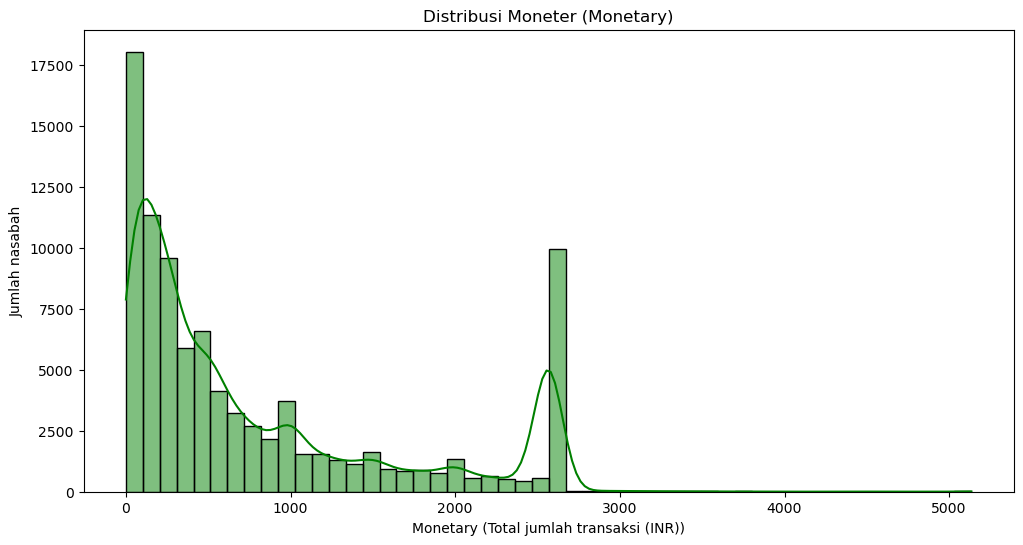

In [35]:
# Visualisasi Monetary
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Monetary'], bins=50, kde=True, color='green')
plt.title('Distribusi Moneter (Monetary)')
plt.xlabel('Monetary (Total jumlah transaksi (INR))')
plt.ylabel('Jumlah nasabah')
plt.show()

In [36]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,92444.00,92444.00,92444.00
mean,135.55,1.02,796.98
std,82.27,0.13,846.92
min,0.00,1.00,0.00
25%,91.00,1.00,160.00
50%,111.00,1.00,449.00
75%,183.00,1.00,1150.00
max,336.00,3.00,5135.00


## Data Preprocessing

In [37]:
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,M,JASPUR,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,M,GURGAON,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,M,NEW DELHI,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,M,HYDERABAD,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,M,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.00,35.00


In [38]:
## Apply Label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
  
df2['CustGender']= le.fit_transform(df2['CustGender'])
df2['CustLocation']= le.fit_transform(df2['CustLocation'])
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,1,1524,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,1,1325,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,1,2437,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,1,1443,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,1,2801,9506.85,2016-09-14,90810,33.00,35.00


In [39]:
df2 = df2.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
892845,1,1524,84447.82,11858.00,39.00
444994,1,1325,12549.49,250.00,30.00
614896,1,2437,33607.65,3360.00,33.00
457036,1,1443,38238.86,250.00,33.00
997441,1,2801,9506.85,33.00,35.00


In [40]:
df2[df2['TransactionAmount (INR)'] == 0].count()

CustGender                 67
CustLocation               67
CustAccountBalance         67
TransactionAmount (INR)    67
CustomerAge                67
dtype: int64

In [41]:
df2 = df2.drop(df2[df2['TransactionAmount (INR)'] == 0].index,axis = 0)

In [42]:
from sklearn.preprocessing import StandardScaler

columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']
s = StandardScaler()
df2 = s.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=columns_names)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,0.62,-0.22,-0.02,1.79,0.04
1,0.62,-0.42,-0.11,-0.21,-0.98
2,0.62,0.70,-0.08,0.33,-0.64
3,0.62,-0.30,-0.08,-0.21,-0.64
4,0.62,1.07,-0.11,-0.25,-0.41


## Data Modelling

In [43]:
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [44]:
# Ekstrak fitur dari DataFrame
X = df2[['CustomerAge', 'TransactionAmount (INR)']].values
Y = df2[['CustLocation', 'TransactionAmount (INR)']].values

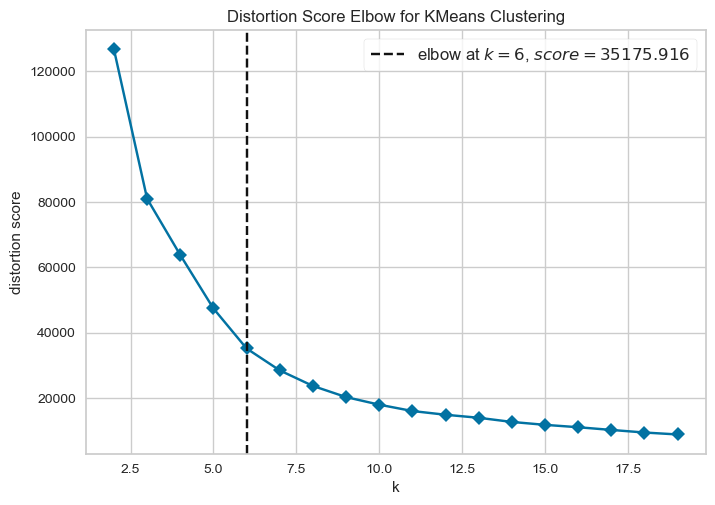

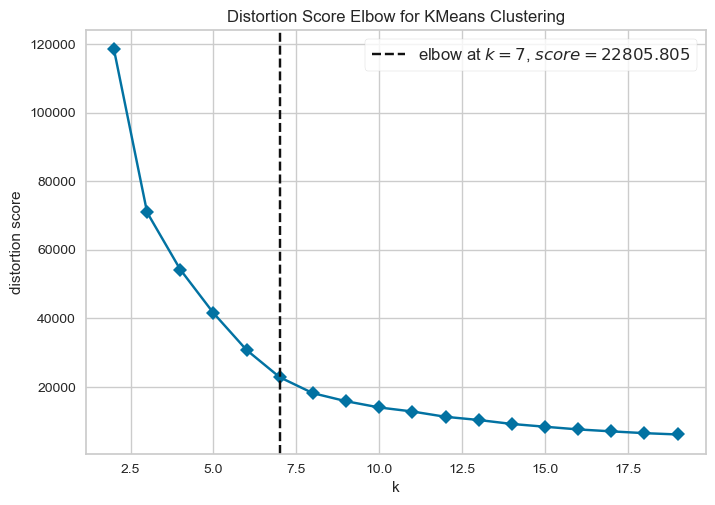

In [45]:
# Fungsi untuk melakukan pengelompokan KMeans dan memplot metode Elbow
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()
    
perform_elbow_method(X, k_range=(2, 20), title='Elbow Method for Customer Age Clustering')
perform_elbow_method(Y, k_range=(2, 20), title='Elbow Method for Customer Location Clustering')

In [46]:
# Fungsi untuk melakukan clustering KMeans dan mengembalikan label cluster dan centroid
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=6)
y_cluster_labels, y_cluster_centers = perform_kmeans_clustering(Y, num_clusters=7)

In [47]:
print("x_cluster_labels",x_cluster_labels)
print("x_cluster_centers",x_cluster_centers)
print("y_cluster_labels",y_cluster_labels)
print("y_cluster_centers",y_cluster_centers)

x_cluster_labels [2 0 0 ... 1 0 0]
x_cluster_centers [[-5.97528962e-01 -1.19598883e-01]
 [ 2.59129949e+00  6.17649847e-02]
 [ 5.41502938e-01 -2.76473419e-02]
 [ 1.00370503e+00  1.60721835e+01]
 [ 5.53615267e-01  4.56228653e+00]
 [ 2.64940295e-01  7.39070628e+01]]
y_cluster_labels [3 3 1 ... 0 0 5]
y_cluster_centers [[-1.20889679e+00 -8.72265968e-02]
 [ 6.58846146e-01 -7.14470116e-02]
 [-3.21964228e-02  1.55602513e+01]
 [-3.14920753e-01 -8.22992226e-02]
 [ 4.72628163e-02  4.28197960e+00]
 [ 1.74173465e+00 -8.97593427e-02]
 [ 2.24274163e-01  7.39070628e+01]]


In [48]:
# Tambahkan label klaster ke DataFrame
df2['cluster_age'] = x_cluster_labels
df2['cluster_location'] = y_cluster_labels

# Tambahkan centroid ke DataFrame
df2['cen_xx'] = df2.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
df2['cen_xy'] = df2.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})
df2['cen_yx'] = df2.cluster_location.map({i: y_cluster_centers[i][0] for i in range(7)})
df2['cen_yy'] = df2.cluster_location.map({i: y_cluster_centers[i][1] for i in range(7)})

df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy
0,0.62,-0.22,-0.02,1.79,0.04,2,3,0.54,-0.03,-0.31,-0.08
1,0.62,-0.42,-0.11,-0.21,-0.98,0,3,-0.60,-0.12,-0.31,-0.08
2,0.62,0.70,-0.08,0.33,-0.64,0,1,-0.60,-0.12,0.66,-0.07
3,0.62,-0.30,-0.08,-0.21,-0.64,0,3,-0.60,-0.12,-0.31,-0.08
4,0.62,1.07,-0.11,-0.25,-0.41,0,1,-0.60,-0.12,0.66,-0.07


In [49]:
# Tentukan warna untuk setiap cluster
colors_X = ['red', 'yellow', 'grey', 'green', 'blue', 'orange']
colors_Y = ['red', 'yellow', 'grey', 'green', 'blue', 'orange', 'pink']

# Tambahkan warna cluster ke DataFrame
df2['color_age_km'] = df2.cluster_age.map({i: colors_X[i] for i in range(6)})
df2['color_location_km'] = df2.cluster_location.map({i: colors_Y[i] for i in range(7)})

Text(0.5, 1.0, 'Customer Age Clustering')

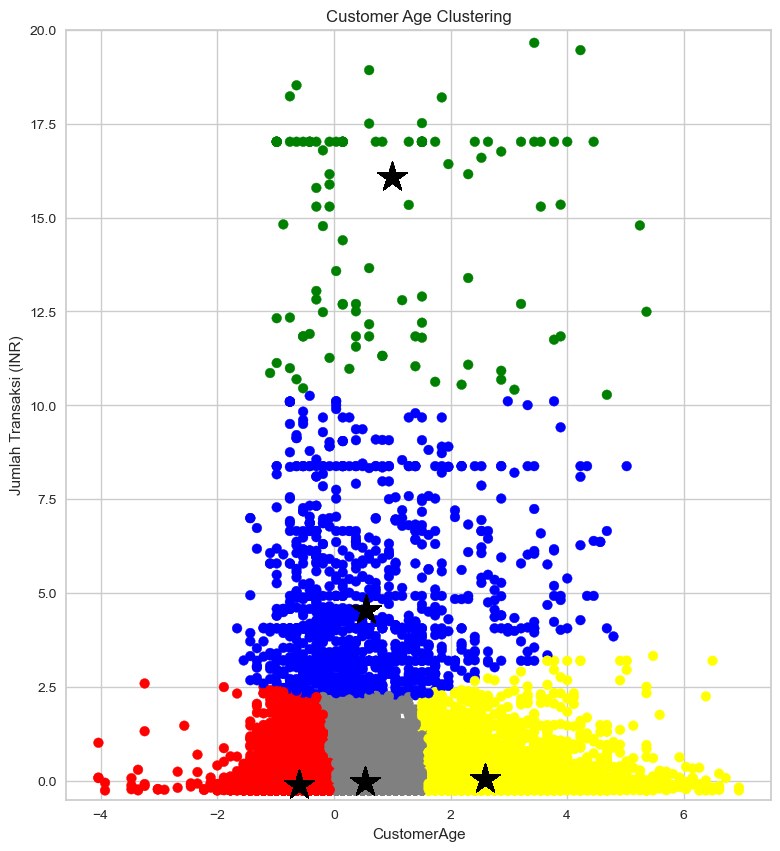

In [50]:
# Scatter plot dengan warna cluster dan centroid untuk 'Customer Age' dan 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df2['CustomerAge'], df2['TransactionAmount (INR)'], c=df2.color_age_km)
plt.scatter(df2['cen_xx'], df2['cen_xy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustomerAge')
plt.ylabel('Jumlah Transaksi (INR)')
plt.title('Customer Age Clustering')

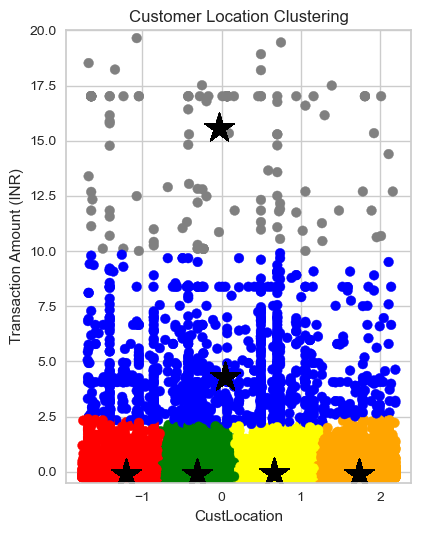

In [51]:
# Scatter plot dengan warna cluster dan centroid untuk 'CustLocation' dan 'TransactionAmount (INR)'
plt.subplot(1, 2, 2)
plt.scatter(df2['CustLocation'], df2['TransactionAmount (INR)'], c=df2.color_location_km)
plt.scatter(df2['cen_yx'], df2['cen_yy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')

plt.tight_layout()  # Mengatur spacing antar plot
plt.show()

In [52]:
from sklearn.metrics import silhouette_score

# Silhouette Score untuk cluster_age
silhouette_score_age = silhouette_score(df2[['TransactionAmount (INR)', 'CustomerAge']], df2['cluster_age'])
print("Silhouette Score for cluster_age:", silhouette_score_age)

# Silhouette Score untuk cluster_location
silhouette_score_location = silhouette_score(df2[['CustLocation','TransactionAmount (INR)']], df2['cluster_location'])
print("Silhouette Score for cluster_location:", silhouette_score_location)

Silhouette Score for cluster_age: 0.5217234335438402
Silhouette Score for cluster_location: 0.5408747561241578


In [53]:
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy,color_age_km,color_location_km
0,0.62,-0.22,-0.02,1.79,0.04,2,3,0.54,-0.03,-0.31,-0.08,grey,green
1,0.62,-0.42,-0.11,-0.21,-0.98,0,3,-0.60,-0.12,-0.31,-0.08,red,green
2,0.62,0.70,-0.08,0.33,-0.64,0,1,-0.60,-0.12,0.66,-0.07,red,yellow
3,0.62,-0.30,-0.08,-0.21,-0.64,0,3,-0.60,-0.12,-0.31,-0.08,red,green
4,0.62,1.07,-0.11,-0.25,-0.41,0,1,-0.60,-0.12,0.66,-0.07,red,yellow


In [54]:
# Memilih kolom numerik untuk perhitungan rata-rata
numeric_columns = df2.select_dtypes(include=np.number).columns

# Menambahkan kolom pengelompokan ke kolom numerik
grouping_columns = ['cluster_age', 'cluster_location']
columns_to_mean = numeric_columns.union(grouping_columns)

# Menghitung rata-rata untuk cluster_age
age_cluster_avg = df2[columns_to_mean].groupby('cluster_age').mean().reset_index()

# Menghitung rata-rata untuk cluster_location
location_cluster_avg = df2[columns_to_mean].groupby('cluster_location').mean().reset_index()

print("Cluster_Age") 
print(age_cluster_avg)
print("\n")
print("Cluster_Location")
print(location_cluster_avg)

Cluster_Age
   cluster_age  CustAccountBalance  CustGender  CustLocation  CustomerAge  \
0            0               -0.06       -0.04         -0.01        -0.60   
1            1                0.32       -0.01          0.02         2.59   
2            2                0.04        0.09          0.01         0.54   
3            3                0.85        0.01          0.01         1.00   
4            4                0.18       -0.04          0.03         0.55   
5            5               -0.07        0.06          0.22         0.26   

   TransactionAmount (INR)  cen_xx  cen_xy  cen_yx  cen_yy  cluster_location  
0                    -0.12   -0.60   -0.12   -0.01   -0.08              1.68  
1                     0.06    2.59    0.06    0.01   -0.04              1.65  
2                    -0.03    0.54   -0.03    0.01   -0.08              1.65  
3                    16.07    1.00   16.07   -0.03   15.56              2.00  
4                     4.56    0.55    4.56    0.04   

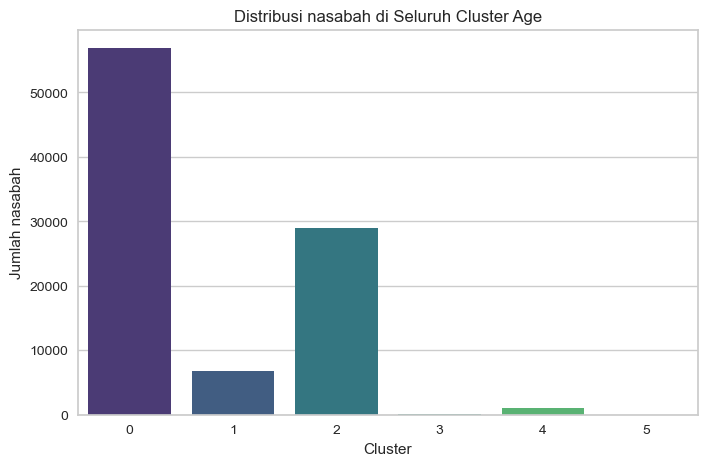

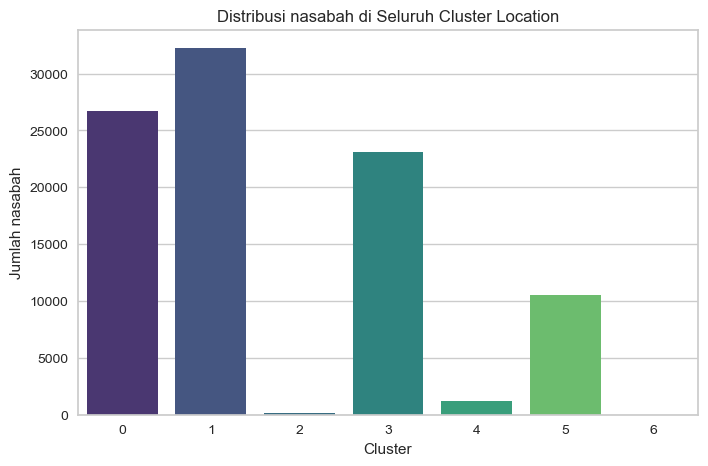

In [55]:
# Hitung jumlah pelanggan di setiap 'cluster_age_km' dan 'cluster_location_km'
age_cluster_counts = df2['cluster_age'].value_counts().reset_index()
age_cluster_counts.columns = ['Cluster', 'Count']

location_cluster_counts = df2['cluster_location'].value_counts().reset_index()
location_cluster_counts.columns = ['Cluster', 'Count']

# Fungsi untuk memplot distribusi cluster
def plot_cluster_distribution(cluster_counts, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster', y='Count', data=cluster_counts, palette='viridis')
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Jumlah nasabah')
    plt.show()


plot_cluster_distribution(age_cluster_counts, title='Distribusi nasabah di Seluruh Cluster Age')
plot_cluster_distribution(location_cluster_counts, title='Distribusi nasabah di Seluruh Cluster Location')